# Introduction

Since the dawn of the space age, humanity has undertaken thousands of space launches, each driven by a blend of scientific curiosity, technological ambition, and geopolitical rivalry. This project analyzes the global landscape of space launches by examining launch data by agency and country, tracking the frequency of failures over time, and delving into the historical space race between the USA and the USSR. This rivalry, intensified during the Cold War, marked a key chapter in the competition for technological and ideological dominance, with each launch symbolizing a step forward in this high-stakes political and scientific duel.

Through this analysis, we aim to uncover trends in space exploration, comparing contributions by various countries and space agencies, and identifying periods of heightened launch activity and associated risks. This perspective sheds light on the progress, challenges, and global efforts driving space exploration over the decades.

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Installing Package with Country Codes

In [1]:
%pip install iso3166

### Upgrading Plotly

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from iso3166 import countries
from datetime import datetime, timedelta
from matplotlib.ticker import MaxNLocator

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

In this section, we will explore the dataset and answer the following questions:
* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
print(f'The dataset has {df_data.shape[0]} rows and {df_data.shape[1]} columns')
print(f'\n', df_data.columns)

The dataset has 4324 rows and 9 columns

 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [8]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [9]:
df_data.duplicated().sum()

0

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [11]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


The dataset is made of 4324 rows and 9 columns, containing the organisation resposinble for the launch, location, date, mission_status, etc.

There are no duplicated rows, but there are 3360 rows with missing values for the 'price' column.

All the columns are classified as the type 'object'. Since we have numerical variables, such as Date and Price, future transformations will be needed.

# Data Cleaning

In this section, we will drop the columns that does not add information to the dataset. The missing values, as well as data type transformations, will be dealt when necessary.

In [12]:
# Removing columns with no usefull information
df_data = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

# Visualizations and Analysis

This section aims to explore the data in depth by creating diverse visualizations to uncover valuable insights. We’ll use a variety of visualization types—such as choropleth maps, sunbursts, bar charts, line graphs, and pie charts—alongside different libraries, including Seaborn, Matplotlib, and Plotly. This approach will allow for a comprehensive view of the data from multiple perspectives.

Each visualization will be accompanied by a detailed text analysis, explaining the insights revealed by the data. This commentary will highlight key patterns, trends, and implications, helping to contextualize the findings and draw meaningful conclusions from the information presented

## Number of Launches per Company



In [83]:
# Counting the number of of launchs by Organisation
launches_per_organization = df_data.groupby(['Organisation'], as_index=False).agg({'Mission_Status': 'count'}).sort_values('Mission_Status', ascending=True)

In [14]:
# Plotting a horizontal bar graph using plotly

ax = px.bar(
    y = launches_per_organization['Organisation'],
    x = launches_per_organization['Mission_Status'],
    orientation='h',
    title='Number of Spacial Launches per Oganisation',
    color=launches_per_organization['Mission_Status'],
    color_continuous_scale=px.colors.sequential.haline
)

# Updating the x axis title
ax.update_layout(xaxis_title='Organisation', yaxis_title='Number of Launches',
                 width=1500,
                 height=1000)

ax.show()

Interestingly, the organization with the highest number of space launches by far isn’t NASA or SpaceX, but rather the former Soviet Union, which launched nearly seven times as many missions as the runner-up, France’s Arianespace.

These figures are striking, especially considering that the United States is widely regarded in the Western world as the victor of the Space Race with the USSR. Additionally, there is a substantial number of organizations with fewer than ten launches, underscoring the sector’s concentration among a few dominant players. This likely reflects the high costs and risks associated with space missions, which limit new entrants and reinforce the leadership of well-established organizations.

It’s also noteworthy that, while U.S. launches are distributed across a wide range of private and public companies, Soviet Union launches were conducted exclusively by a single organization under government control during the communist era. This centralization reflects the Soviet approach to space exploration, where the state managed all aspects of space activity, unlike the more diverse, market-driven approach seen in the U.S.

## Number of Active versus Retired Rockets



In [15]:
# grouping the data by Rocket Status
rocket_status = df_data.groupby('Rocket_Status').size()

rocket_status

,0
Rocket_Status,
StatusActive,790
StatusRetired,3534


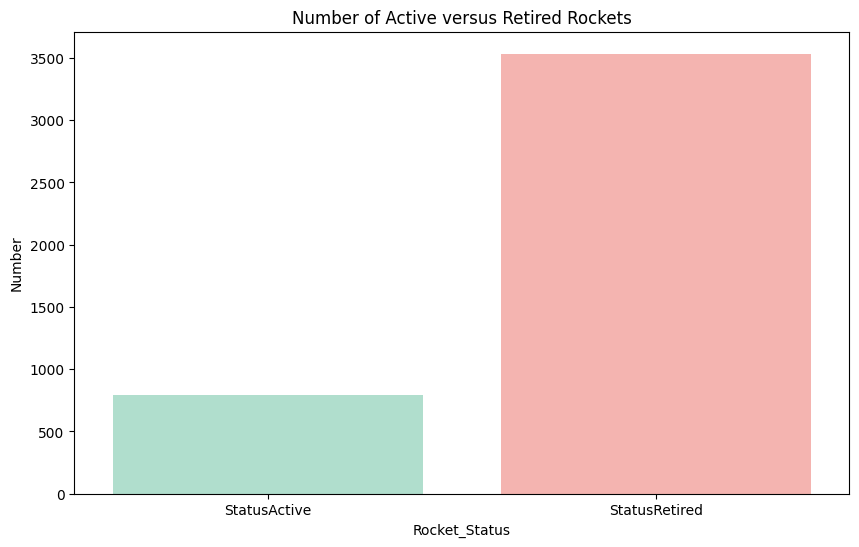

In [16]:
# Plotting the data using a simple sns barplot
plt.figure(figsize=(10, 6))

plt.title('Number of Active versus Retired Rockets')

sns.barplot(x=rocket_status.index,
            y=rocket_status.values,
            hue=rocket_status.index,
            palette=['#a8e6cf', '#ffaaa5'])

# Setting y and x labels
plt.xlabel=('Rocket Status')
plt.ylabel('Number')

plt.show()

There are a total of 790 active rockets compared to 3,534 retired ones, indicating that less than 20% of rockets used for space missions remain operational. Given that space exploration began in the early second half of the 20th century, the technology available at the time likely did not support multiple reuses, which helps explain the high retirement rate. Advances in technology have since enabled more reusable designs, but the large number of retired rockets reflects the earlier limitations in durability and reusability


## Distribution of Mission Status

In [75]:
# Grouping the data by mission status categories and calculating its total
df_data['Mission_Status'].value_counts(normalize=True) * 100

,proportion
Mission_Status,
Success,89.71
Failure,7.84
Partial Failure,2.36
Prelaunch Failure,0.09


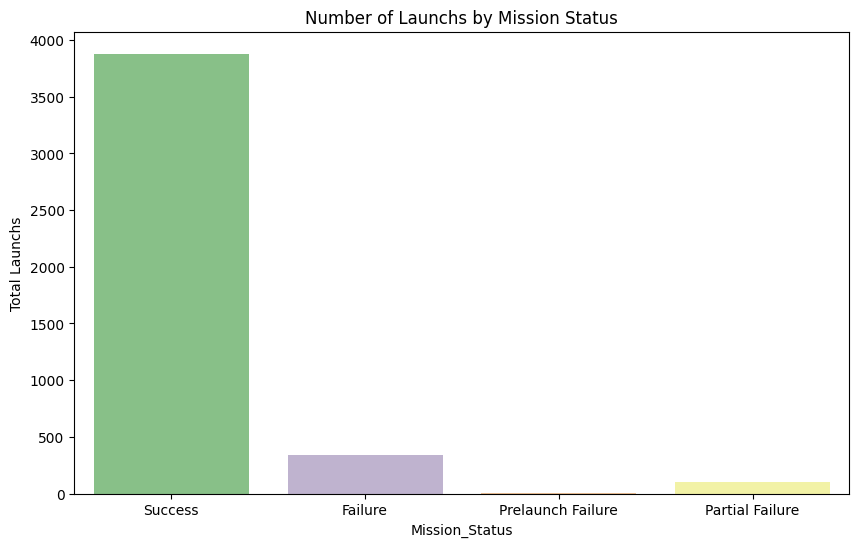

In [18]:
# Plotting the data using a simple sns barplot
plt.figure(figsize=(10, 6))

plt.title('Number of Launchs by Mission Status')

sns.countplot(data=df_data,
              x='Mission_Status',
              hue='Mission_Status',
              legend=False,
              palette='Accent')

# Setting y and x labels
plt.xlabel=('Mission Status')
plt.ylabel('Total Launchs')

plt.show()

Ninety percent of missions have been successful, which is a remarkably high average. However, this percentage likely changes over time, as technological advancements have played a significant role in reducing failure rates. Analyzing this trend over the years would reveal how improvements in technology and experience have contributed to mission success rates, and we will do this in some of the following analysis.

## How Expensive are the Launches?

Before analysing the price column, we need to deal with two problems: the datatype of the column and the missing values:

1) To solve the missing values problem, since we dont have any more information abou the column, we will analyse only the mission where the price information is present, by subsetting the dataset;

2) To transform the price column form an 'object' type column to a 'numeric' one, we first need to replace the column sign that has been used to separate the thousand units.

In [19]:
# Creating a subset of the original dataset excluding the entries where there is no price information
df_data_price = df_data.loc[df_data['Price'].notnull()]

# Deleting the commma sign from the price column and transforming into numerical
df_data_price['Price'] = df_data_price['Price'].str.replace(',', '')
df_data_price['Price'] = pd.to_numeric(df_data_price['Price'])

<ipython-input-19-c552c98c0d5e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-c552c98c0d5e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



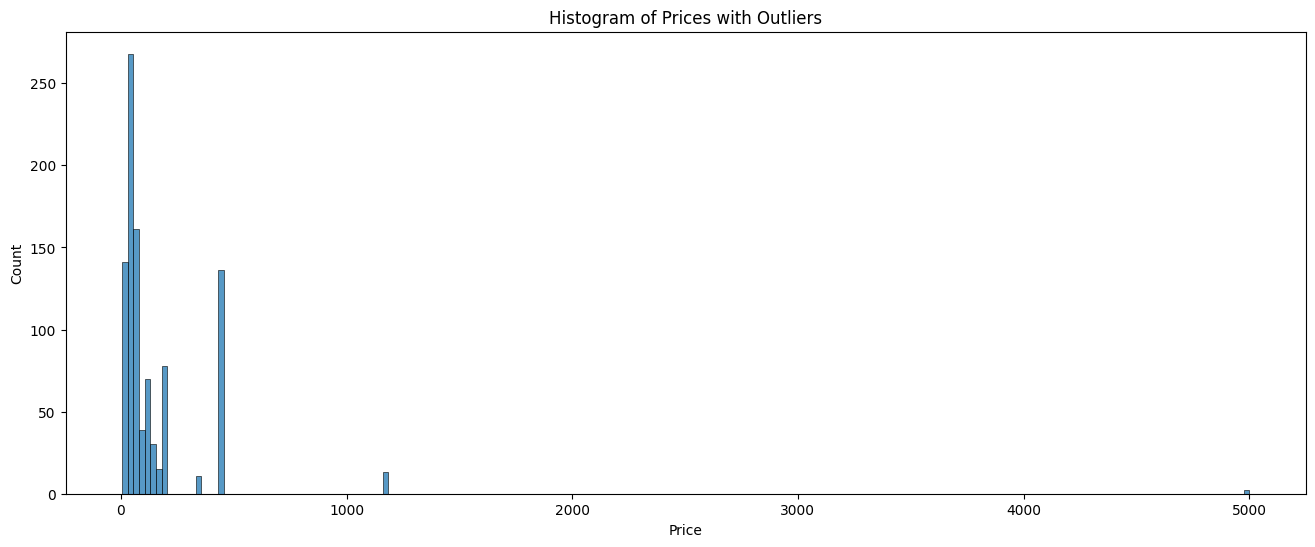

In [20]:
# Ploting a histoplot of the price range for the space launchs using seaborn
fig = plt.figure(figsize=(16, 6))

ax = sns.histplot(data=df_data_price,
                  x='Price')

ax.set_title('Histogram of Prices with Outliers')
plt.show()

In [21]:
print(f'There are {df_data_price.loc[df_data_price["Price"] > 1000].shape[0]} outliers with the price higher than 1000 and\
 {df_data_price.loc[df_data_price["Price"] < 1000].shape[0]} where the price is lower than 1000')

There are 15 outliers with the price higher than 1000 and 949 where the price is lower than 1000


In [22]:
df_data_price.loc[df_data_price["Price"] > 1000]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.00",Success
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.00",Success
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.00",Success
3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Jul 26, 1971 13:34 UTC",Saturn V | Apollo 15,StatusRetired,"1,160.00",Success
3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.00",Success
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.00",Success
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success


Most launches had costs below \$450 million. However, a few outliers complicate the visualization of the overall distribution (e.g. the space launch made by USSR Energiya, costing incredibles $5.000 millions).
These outliers are primarily associated with space missions conducted in the early stages of the Space Race, during a time when launch costs were significantly higher compared to today. This discrepancy underscores the evolution of space technology and economics, which have led to reduced launch costs and greater accessibility in more recent years.

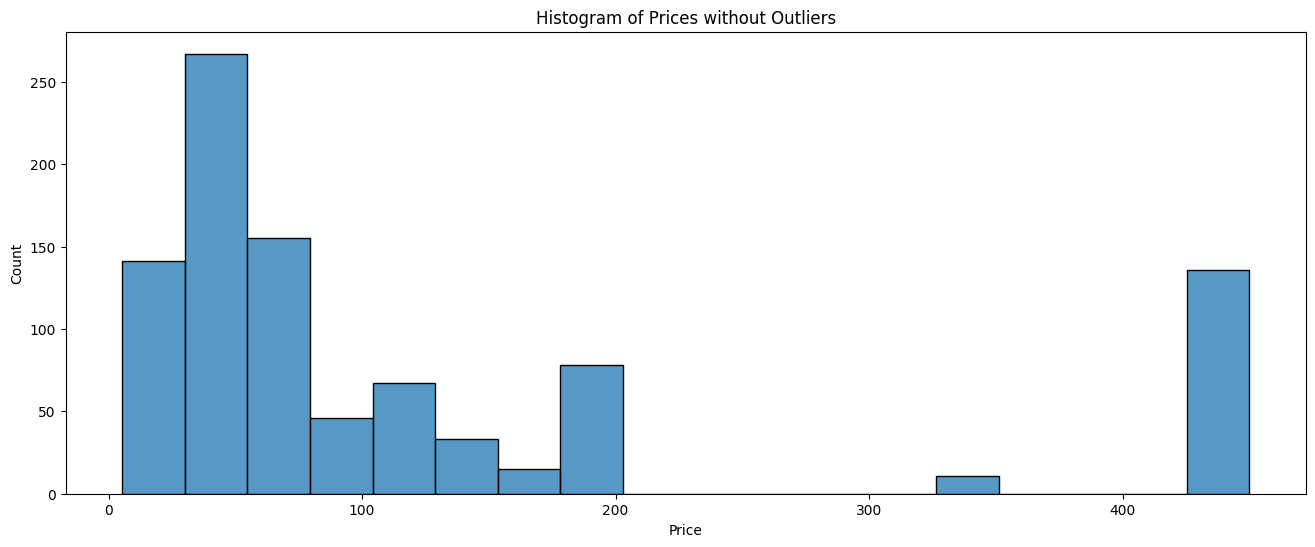

In [23]:
# Plotting a new histogram without the outliers
fig = plt.figure(figsize=(16, 6))

ax = sns.histplot(data=df_data_price.loc[df_data_price['Price'] < 1000],
                  x='Price')

ax.set_title('Histogram of Prices without Outliers')

plt.show()

By excluding the outliers from the data, it's clear that the majority of the launchs cost are within the range of \$5 to $100 millions, which is still incredibly costly for an organisation.

## Number of Launches by Country

To show the number of launchs in a map, we need the location information from our dataset. Although the information is present in the 'Location' column, there are some necessary action to be taken in order to properly use this data.

1) Split the information of the 'Location' variable into new columns, using comma as the delimiter:

In [24]:
# Creating a new table with the location data by splitting the column location to create a new column for the Site Code, Site, State and Country
df_locations = df_data['Location'].str.split(',', expand=True)
df_locations.columns=['Site_code', 'Site', 'State', 'Country']

# Replacing eventuals missing values for State and Country by it's closest match
df_locations['State'] = df_locations['State'].fillna(df_locations['Site'])
df_locations['Country'] = df_locations['Country'].fillna(df_locations['State'])

# Looping through each column andremoving any leading, and trailing whitespaces
for c in df_locations.columns:
  df_locations[c] = df_locations[c].str.strip()

# Calculating the number of launchs per Country
df_locations.groupby('Country').size()

,0
Country,
Australia,6
Barents Sea,3
Brazil,3
China,268
France,303
Gran Canaria,2
India,76
Iran,13
Israel,11


2) Merging the table containig the locations data with the original dataset

In [25]:
# Joining the two tables on their indexes
df_data = df_data.join(df_locations)

# Dropping the column Location, since we have it's information splitted already
df_data.drop('Location', axis=1, inplace=True)

# Checking the final dataset
df_data.head()

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,Site_code,Site,State,Country
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA
1,CASC,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan
4,ULA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA


3) To plot the number of launchs by country, it's necessary to replace some of the countrie's names present in the dataset, as the following list:

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA

And so on...

After that, we can use iso3166 package to convert the country names to Alpha3 format.

In [26]:
# Cjecking the countries names
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [27]:
# Creating a dictionary to be used with the replace function
dict_names = {
    'Russia': 'Russian Federation',
    'Russia Federation': 'Russian Federation',
    'New Mexico': 'United States of America',
    'USA': 'United States of America',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'United States of America',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'United States of America',
    'North Korea': 'Korea, Democratic People\'s Republic of',
    'South Korea': 'Korea, Republic of',
    'Iran': 'Iran, Islamic Republic of',
    'Pacific Ocean': 'United States of America',

}

# Replacing the countries names in the original dataset
df_data.replace(dict_names, inplace=True)

# Checking the result
df_data['Country'].unique()

array(['United States of America', 'China', 'Kazakhstan', 'Japan',
       'Israel', 'New Zealand', 'Russian Federation',
       'Iran, Islamic Republic of', 'France', 'India',
       "Korea, Democratic People's Republic of", 'Korea, Republic of',
       'Brazil', 'Kenya', 'Australia'], dtype=object)

4) Finding the corresponding alpha-3 code for each country and saving into a new dataframe

In [28]:
# Initializing an empty list to store alpha3 codes
alpha_dict = {}

# Creating a function to get the corresponding alpha code for each country's name
def get_alpha_code(countries_list):
    for name in countries_list:
        found = False

        # Looping through the list of countries from iso3166
        for country in countries:
            if country.name.lower() == name.lower():  # Case insensitive comparison
                alpha_dict[name] = country.alpha3  # Appending the alpha-3 code
                found = True
                break  # Exit loop once a match is found

        if not found:
            alpha_dict[name] = 'NA'  # Append 'NA' if no match is found
    return alpha_dict

# Converting the 'Country' column to a list and getting the alpha-3 codes
alpha_dict = get_alpha_code(df_data['Country'].to_list())

# Converting the dictionary to a tuple and then to a DataFrame
alpha_df = pd.DataFrame(list(alpha_dict.items()), columns=['Country', 'Alpha3'])

5) Merging the alpha-3 dataset with the original one

In [29]:
# Merging the ahpa dataframe with the original dataset on the 'Country' column
df_data_merged = pd.merge(df_data, alpha_df, on='Country')

# Checking the result
df_data_merged.head(3)

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,Site_code,Site,State,Country,Alpha3
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,United States of America,USA
1,CASC,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,CHN
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,United States of America,USA


In [30]:
df_data_merged.loc[df_data_merged['Mission_Status'] == 'Failure']

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,Site_code,Site,State,Country,Alpha3
11,ExPace,"Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,Site 95,Jiuquan Satellite Launch Center,China,China,CHN
15,Rocket Lab,"Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,Rocket Lab LC-1A,M?hia Peninsula,New Zealand,New Zealand,NZL
27,Virgin Orbit,"Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,Cosmic Girl,Mojave Air and Space Port,California,United States of America,USA
36,CASC,"Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,LC-2,Xichang Satellite Launch Center,China,China,CHN
43,CASC,"Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,LC-201,Wenchang Satellite Launch Center,China,China,CHN
...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,United States of America,USA
4315,RVSN USSR,"Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,KAZ
4318,AMBA,"Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,LC-26A,Cape Canaveral AFS,Florida,United States of America,USA
4319,US Navy,"Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,United States of America,USA


6) Grouping by country name and alpha code, and filtering for only successfull missions

In [31]:
df_launchs = df_data_merged.loc[df_data_merged['Mission_Status'] == 'Success'].groupby(['Country', 'Alpha3'], as_index=False).size()

In [32]:
# Plotting the final dataframe into a choropleth graph using plotly
fig = px.choropleth(
    df_launchs,
    locations='Alpha3',
    color='size',
    locationmode='ISO-3',
    color_continuous_scale='sunset',
    hover_name='Country',
    title='Number of Sucessfull Launchs per Country'
)

fig.update_layout(
    title_x=0.5,
    margin={'r': 0, 't': 50, 'l': 0, 'b': 0},
    height=600,
    width=1200
)

fig.show()

Russia and the USA lead the rankings for the highest number of successful launches. However, if Kazakhstan's figures (as a former Soviet Republic) are combined with Russia's, the USSR claims the top position, with the USA following at a notable distance. The success rate is close to the total number of launches, highlighting a consistently low failure rate over time.

China also stands out, as significant investment in its space program over recent decades has led to impressive advancements, reflected in a relatively high number of successful launches.

Lastly, it’s interesting to see other, lesser-known countries achieving success in space exploration, such as Kenya, Australia, New Zealand, and Iran, indicating the global reach and growing accessibility of space initiatives.

## Number of Failures by Country


In [70]:
# Filtering the dataset by the failures
df_launchs = df_data_merged.loc[df_data_merged['Mission_Status'] == 'Failure'].groupby(['Country', 'Alpha3'], as_index=False).size()

In [71]:
fig = px.choropleth(
    df_launchs,
    locations='Alpha3',
    color='size',
    locationmode='ISO-3',
    color_continuous_scale='sunset',
    hover_name='Country',
    title='Number of Failures per Country'
)

fig.update_layout(
    title_x=0.5,
    margin={'r': 0, 't': 50, 'l': 0, 'b': 0},
    height=600,
    width=1200
)

fig.show()

nterestingly, although the USSR has a significantly higher total number of launches than the USA, both countries recorded a nearly equal number of failures. This suggests that the USA experienced a higher proportion of failed launches relative to its total, indicating a steeper learning curve in early space exploration efforts.

It's also worth noting Brazil’s experience: despite attempts to establish a presence in space with two launch attempts, both resulted in failure, and further development efforts appear to have stalled since then. This highlights the challenges many countries face in sustaining a successful space program.

## Analysing the Mission Status by Country and Organisation with a Sunburst Graph

In [35]:
# Creating a datafram with the number of launchs by country, orgnisation and mission status
df_sun = df_data.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).size().sort_values('size', ascending=False)
df_sun.head()

,Country,Organisation,Mission_Status,size
81,Russian Federation,RVSN USSR,Success,1119
58,Kazakhstan,RVSN USSR,Success,495
19,France,Arianespace,Success,267
9,China,CASC,Success,231
103,United States of America,General Dynamics,Success,203


In [36]:
# Plotting a sunburst graph using plotly
burst = px.sunburst(df_sun,
                    path=['Country', 'Organisation', 'Mission_Status'],
                    values='size',
                    title='Space Launchs Distribution by Location',
                   )

# Updating layout
burst.update_layout(xaxis_title='Number of Launchs',
                    yaxis_title='Organisation',
                    title_x=0.5,
                    coloraxis_showscale=False,
                    margin={'r': 0, 't': 50, 'l': 0, 'b': 0},
                    height=600,
                    width=1200
                    )

burst.show()


The organization with the highest number of launches was clearly the Soviet Union’s space agency. Following this, NASA in the USA ranks second, while China’s CASC also shows a significant number of launches, reflecting China’s substantial investments in space exploration. Notably, China operates with a single, centrally controlled space organization, CASC, highlighting the centralized structure typical of non-democratic states where space agencies are overseen by the government—in this case, by the Chinese Communist Party.

## Total Amount of Money Spent by Organisation on Space Missions

In [37]:
# Grouping by organisation and summing the total spent
df_grouped = df_data_price.groupby('Organisation', as_index=False).agg({'Price': 'sum'}).sort_values(by='Price')
df_grouped.head(5)

,Organisation,Price
24,Virgin Orbit,12.00
19,Sandia,15.00
3,EER,20.00
6,ExPace,28.30
4,ESA,37.00


In [38]:
# Plotting a horizontal bar
h_bar = px.bar(
        x = df_grouped['Price'],
        y = df_grouped['Organisation'],
        orientation='h',
        title='Total Spent by Organisation in Launchs',
        color = df_grouped['Price'],
        color_continuous_scale='sunsetdark')

h_bar.update_layout(xaxis_title='Total Spent',
                    yaxis_title='Category',
                    title_x=0.5,
                    height=800)
h_bar.show()

There is limited data on the financial resources allocated to space launches by the USSR and China, which partly explains why organizations from these countries do not lead the rankings in spending. However, it’s insightful to compare NASA, an American agency, with similar organizations in other democracies, like France’s Arianespace. NASA’s significantly higher expenditure on space exploration reflects the influence of geopolitical competition with the USSR during the Cold War era.

Even compared to private U.S. companies like SpaceX, NASA remains the top spender in space exploration. This is largely due to its long-standing government-backed status and its historical role in spearheading the U.S. space program long before private companies like SpaceX emerged.

## Average Amount of Money Spent by Organisation per Launch

In [39]:
# Creating a dataframe with the price mean per organisation
avg_spent = df_data_price.groupby('Organisation', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False)

<ipython-input-40-32454d6616fc>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



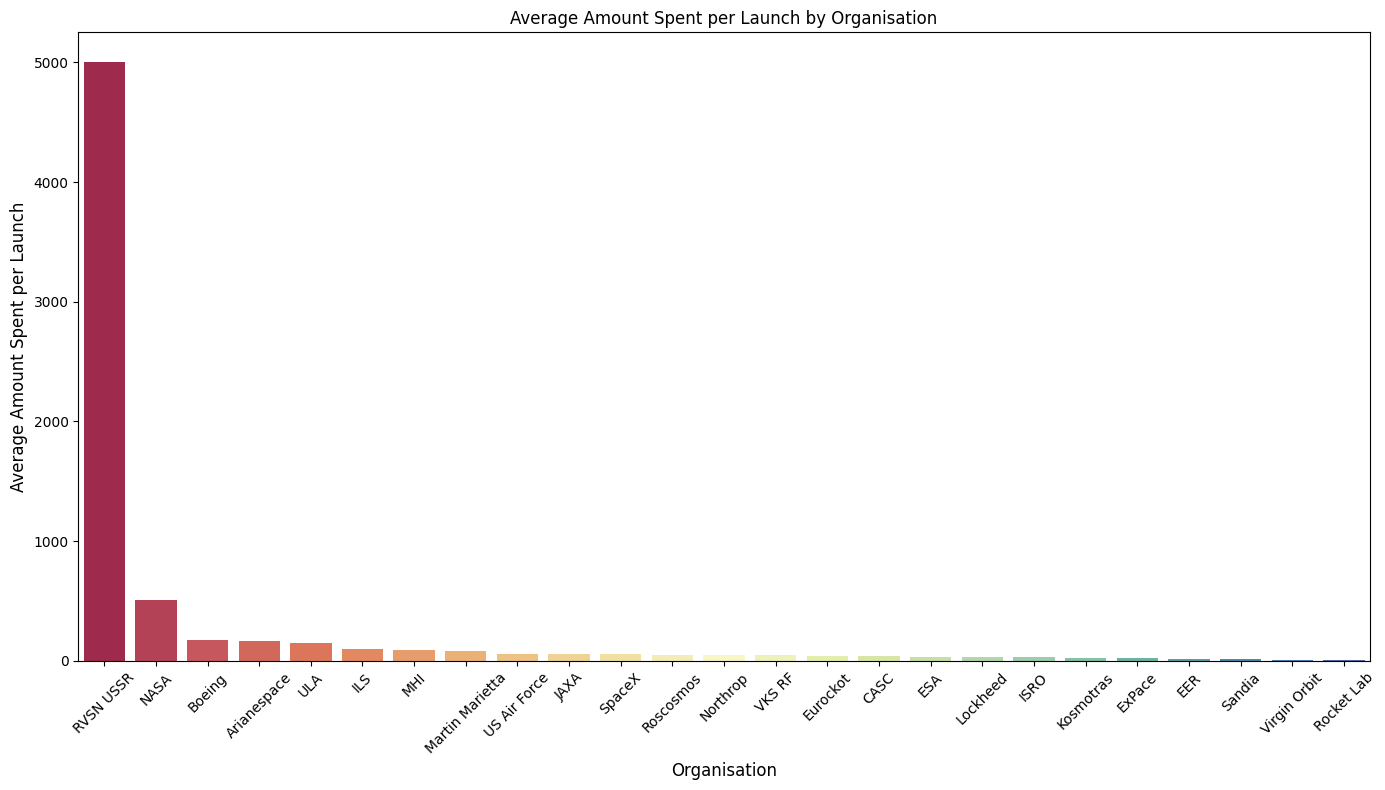

In [40]:
# Plotting a barplot using seaborn
fig = plt.figure(figsize=(14, 8))

ax = sns.barplot(data=avg_spent,
                 x='Organisation',
                 y='Price',
                 hue='Organisation',
                 palette = "Spectral")


ax.set_ylabel('Average Amount Spent per Launch', fontsize=12)
ax.set_xlabel('Organisation', fontsize=12)
ax.set_title('Average Amount Spent per Launch by Organisation', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.tight_layout()

plt.show()

Again, due to the lack of information regarding the launchs made during the Sovietic Republic, it's better to remove the USSR organisations from the data and focus the analysis on countries where there are more information available.

<ipython-input-41-940cd3ac2dc1>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



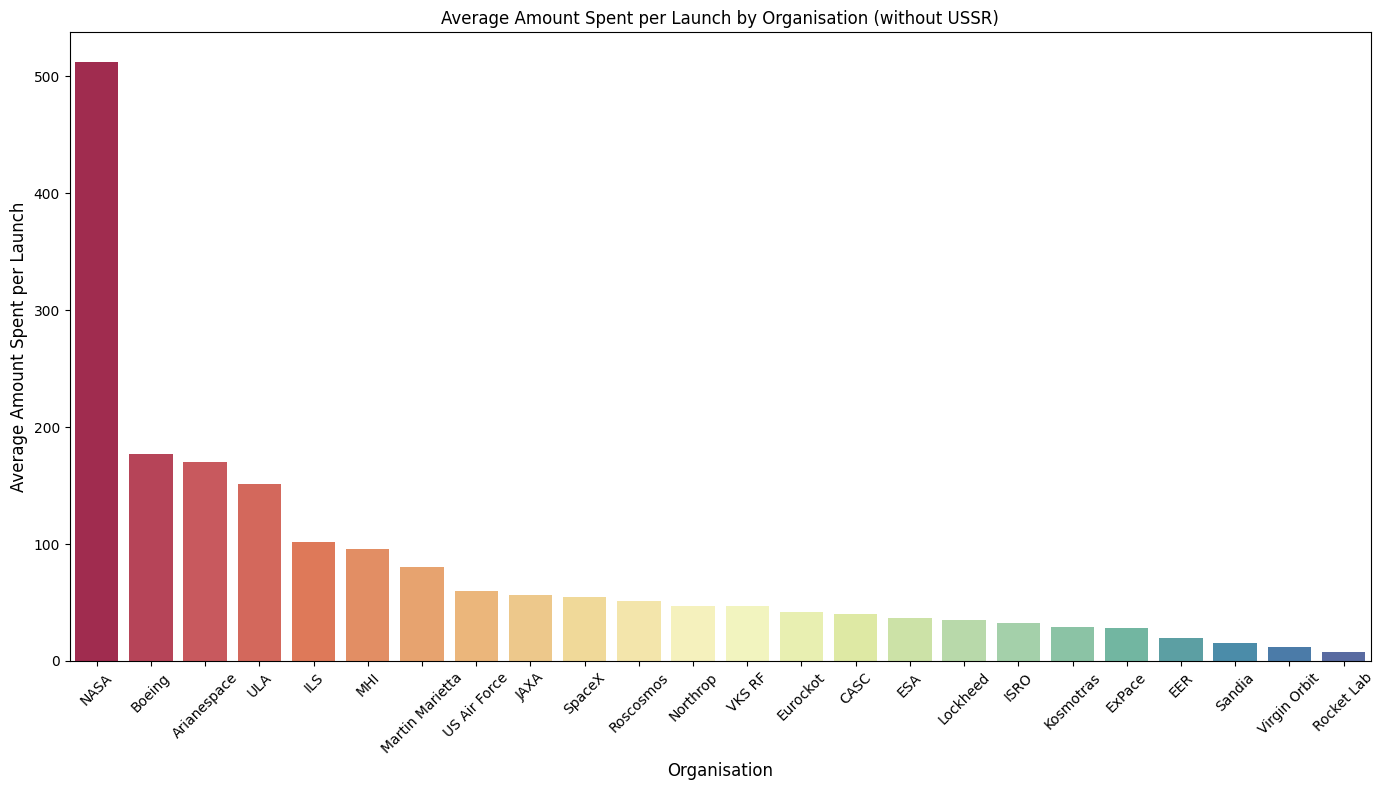

In [41]:
# Plotting the graph again without USSR
fig = plt.figure(figsize=(14, 8))

ax = sns.barplot(data=avg_spent.loc[avg_spent['Price'] < 5000],
                 x='Organisation',
                 y='Price',
                 hue='Organisation',
                 palette = "Spectral")


ax.set_ylabel('Average Amount Spent per Launch', fontsize=12)
ax.set_xlabel('Organisation', fontsize=12)
ax.set_title('Average Amount Spent per Launch by Organisation (without USSR)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.tight_layout()

plt.show()

NASA ranks first in terms of average launch costs. As the primary U.S. space agency since the start of the Cold War—an era when space technology was still in its infancy—it’s unsurprising that NASA’s launches and development efforts have been among the most costly. Organizations that emerged later benefited from more advanced technology, allowing them to conduct launches more cost-effectively. NASA’s high average costs reflect the pioneering investments needed to establish foundational space capabilities that later organizations could build upon

## Evolution of the Number of Launches per Year

In [42]:
# Converting the field 'Launch Date' to datetime format and handling errors as NA values
df_data['Launch Date'] = pd.to_datetime(df_data['Date'],
                                        format='%a %b %d, %Y %H:%M UTC',
                                        errors='coerce')

# Filling missing values with the second date format (date without time)
df_data['Launch Date'].fillna(pd.to_datetime(df_data['Date'], format='%a %b %d, %Y', errors='coerce'), inplace=True)

# Printing the updated DataFrame with only the date
df_data['Launch Year'] = df_data['Launch Date'].dt.year

<ipython-input-42-ac57ef4b16dd>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [43]:
# Grouping the number of launchs per year
df_launch_year = df_data.groupby('Launch Year').agg({'Mission_Status': 'count'}).reset_index()

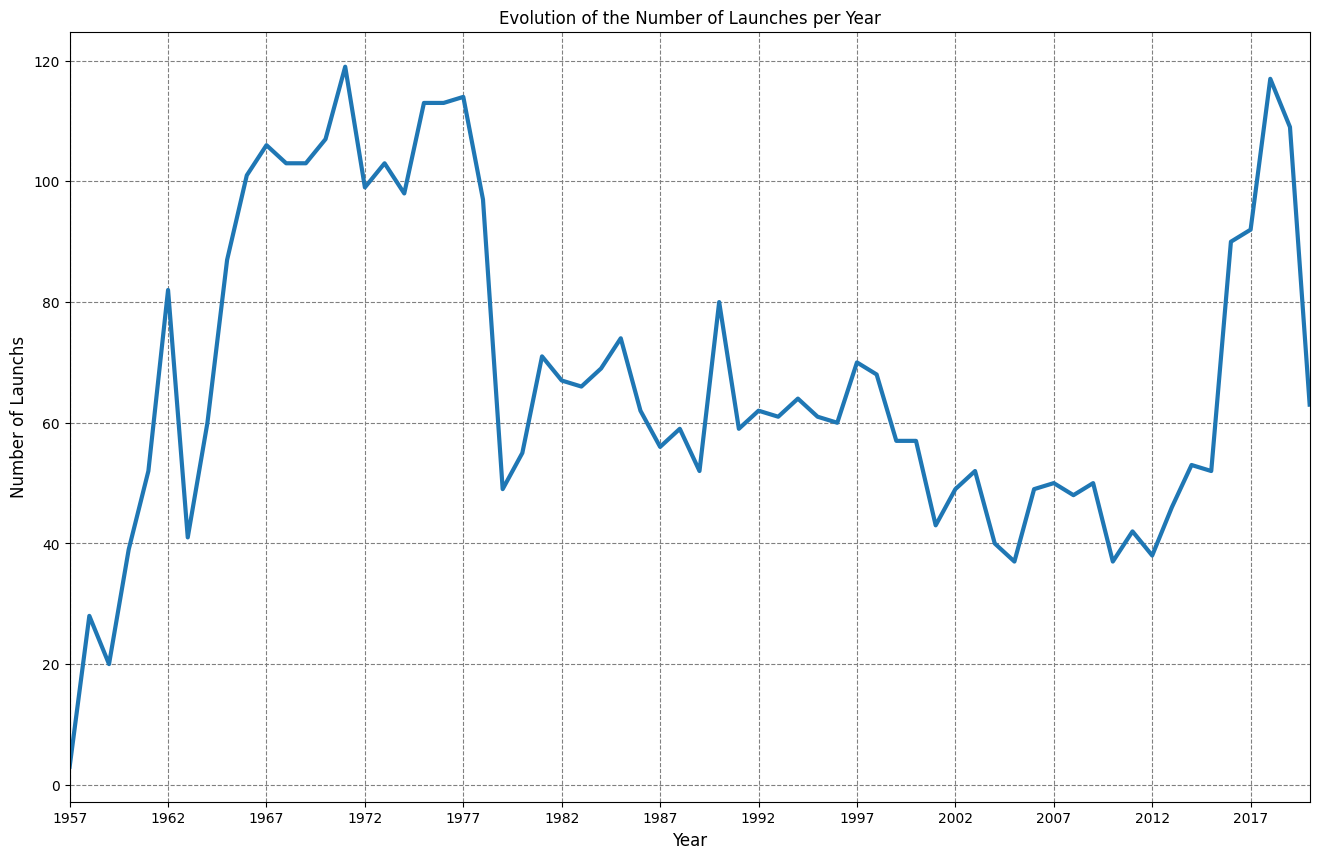

In [44]:
# Plotting a lineplot using seaborn and setting the xtick locator to every 5 years using MaxNLocator
fig = plt.figure(figsize=(16, 10))

ax = sns.lineplot(x=df_launch_year['Launch Year'],
                  y=df_launch_year['Mission_Status'],
                  linewidth=3)

ax.set_ylabel('Number of Launchs', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_title('Evolution of the Number of Launches per Year', fontsize=12)

# Setting the limits for the xaxis
ax.set_xlim([df_launch_year['Launch Year'].min(), df_launch_year['Launch Year'].max()])
ax.grid(color='grey', linestyle='--') # Adding a grid

# Setting x-ticks to show every 5 years
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins='auto', min_n_ticks=5))
ax.set_xticks(range(df_launch_year['Launch Year'].min(), df_launch_year['Launch Year'].max() + 1, 5))

plt.show()

A clear pattern emerges during the Cold War era, with a steady increase in the number of space launches driven by the intense space race between the USA and the USSR. However, following the Cold War’s end, there was a marked decline as governments and organizations redirected resources to other priorities. Yet, after 2012, a resurgence in launch activities is evident, led by a new global player, China. China has been rapidly expanding its presence in space, conducting a series of launches that reflect its growing investment and ambition in space exploration.

## Number of Launches Month-on-Month until the Present, including it's Cumulative Sum

In [45]:
# Creating a new field with the month
df_data['Launch Month'] = df_data['Launch Date'].dt.to_period('M')

# Grouping by the month and summing the number of launchs
monthly_groups = df_data.groupby(by='Launch Month', as_index=False).agg({'Launch Year': 'count'}).rename(columns={'Launch Year': 'Total Launchs'})

# Filtering for the highest value
monthly_groups.sort_values(by='Total Launchs', ascending=False).head(1)

,Launch Month,Total Launchs
164,1971-12,18


In [46]:
# Creating a table containig the cumulative sum for the total launchs
monthly_groups['Roll Total'] = monthly_groups['Total Launchs'].cumsum()

# Converting 'Launch Month' from 'period' to 'datetime'
monthly_groups['Launch Month'] = monthly_groups['Launch Month'].dt.to_timestamp()

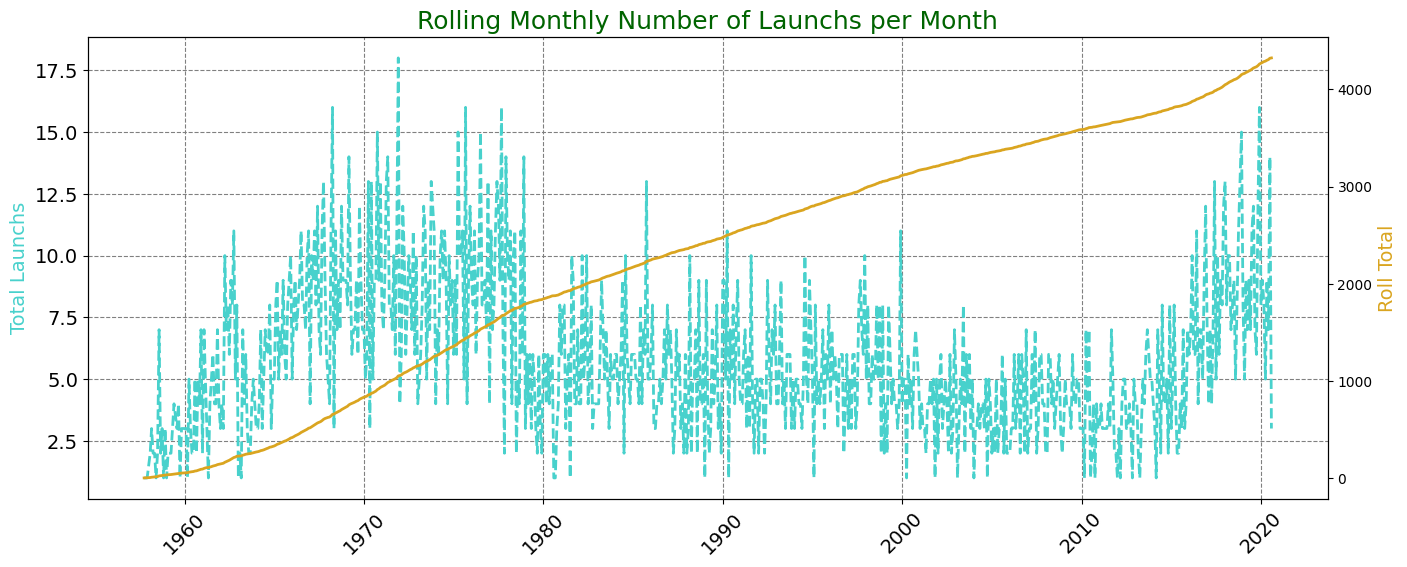

In [47]:
# Adjusting the size of the graph, resol, x and y ticks
plt.figure(figsize=(16,6), dpi=100)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Rolling Monthly Number of Launchs per Month', fontsize=18, color='darkgreen')

# Creating two axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Setting labels and colors
ax1.set_ylabel('Total Launchs', color = 'mediumturquoise', fontsize=14)
ax2.set_ylabel('Roll Total', color = 'goldenrod', fontsize=14)

# Setting grid
ax1.grid(color='grey', linestyle='--')
ax1.set_axisbelow(True)

# Plotting both axis
ax1.plot(monthly_groups['Launch Month'],
         monthly_groups['Total Launchs'],
         color = 'mediumturquoise', lw='2', linestyle='--')
ax2.plot(monthly_groups['Launch Month'],
         monthly_groups['Roll Total'],
         color = 'goldenrod', linewidth=2)

plt.show()

## Launches per Month: Most and Least Popular


In [48]:
# Grouping per month
month_grouped = df_data.groupby(by=df_data['Launch Date'].dt.month).size().reset_index(name='Total Launchs')
month_grouped.head(3)

,Launch Date,Total Launchs
0,1,268
1,2,336
2,3,353


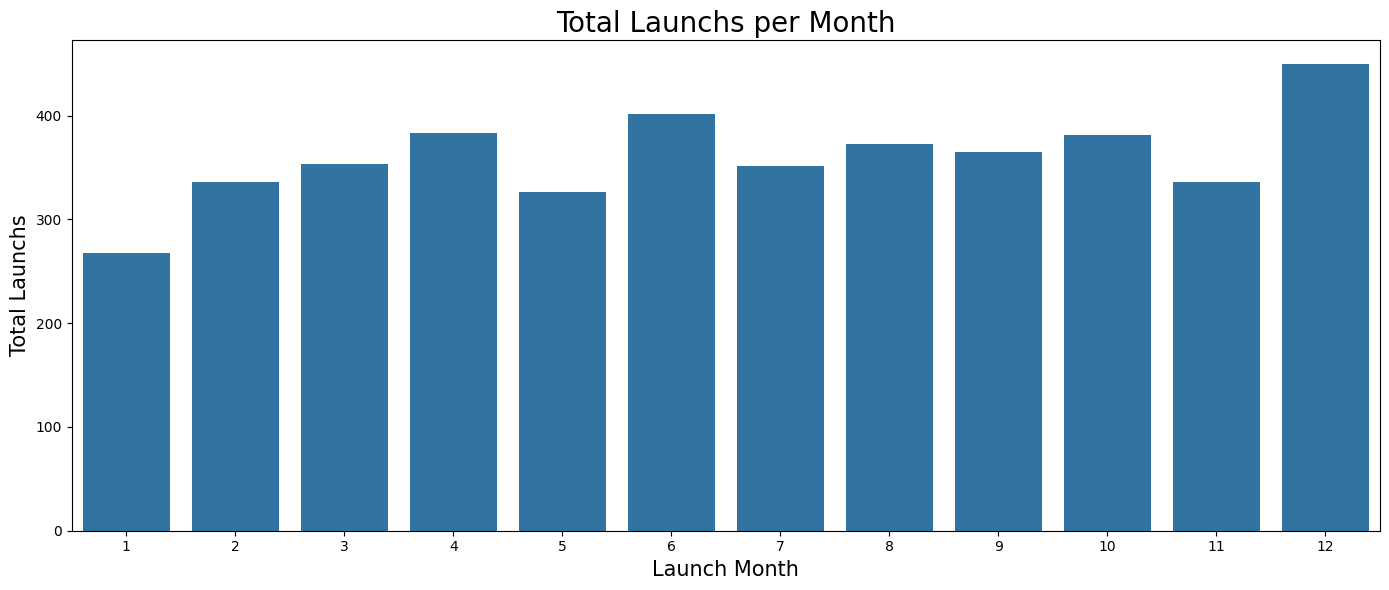

In [49]:
# Plotting barplot using seaborn
fig = plt.figure(figsize=(14, 6))

plt.title('Total Launchs per Month', fontsize=20, color='black')

ax = sns.barplot(x='Launch Date',
             data=month_grouped,
             y='Total Launchs')

ax.set_ylabel('Total Launchs', fontsize=15)
ax.set_xlabel('Launch Month', fontsize=15)

fig.tight_layout()

plt.show()

The most favorable months for space launches appear to be December and June, while the beginning of the year tends to be less ideal for such missions. This pattern likely reflects the seasonal weather conditions typical of each launch site or country, which can significantly impact the success rate of launches. Favorable weather conditions, such as clear skies and stable winds, are crucial for safe and successful launches, and the variation in seasonal climate may explain the higher frequency

## Launch Price Over Time

In [50]:
# Converting the Date field to timestamp and handling missing values
df_data_price['Date'] = pd.to_datetime(df_data_price['Date'],
                                        format='%a %b %d, %Y %H:%M UTC',
                                        errors='coerce')

# Creatin a Year field
df_data_price['Year'] = df_data_price['Date'].dt.year

# Grouping by the year and the mean
price_mean = df_data_price.groupby('Year', as_index=False).agg({'Price': 'mean'})

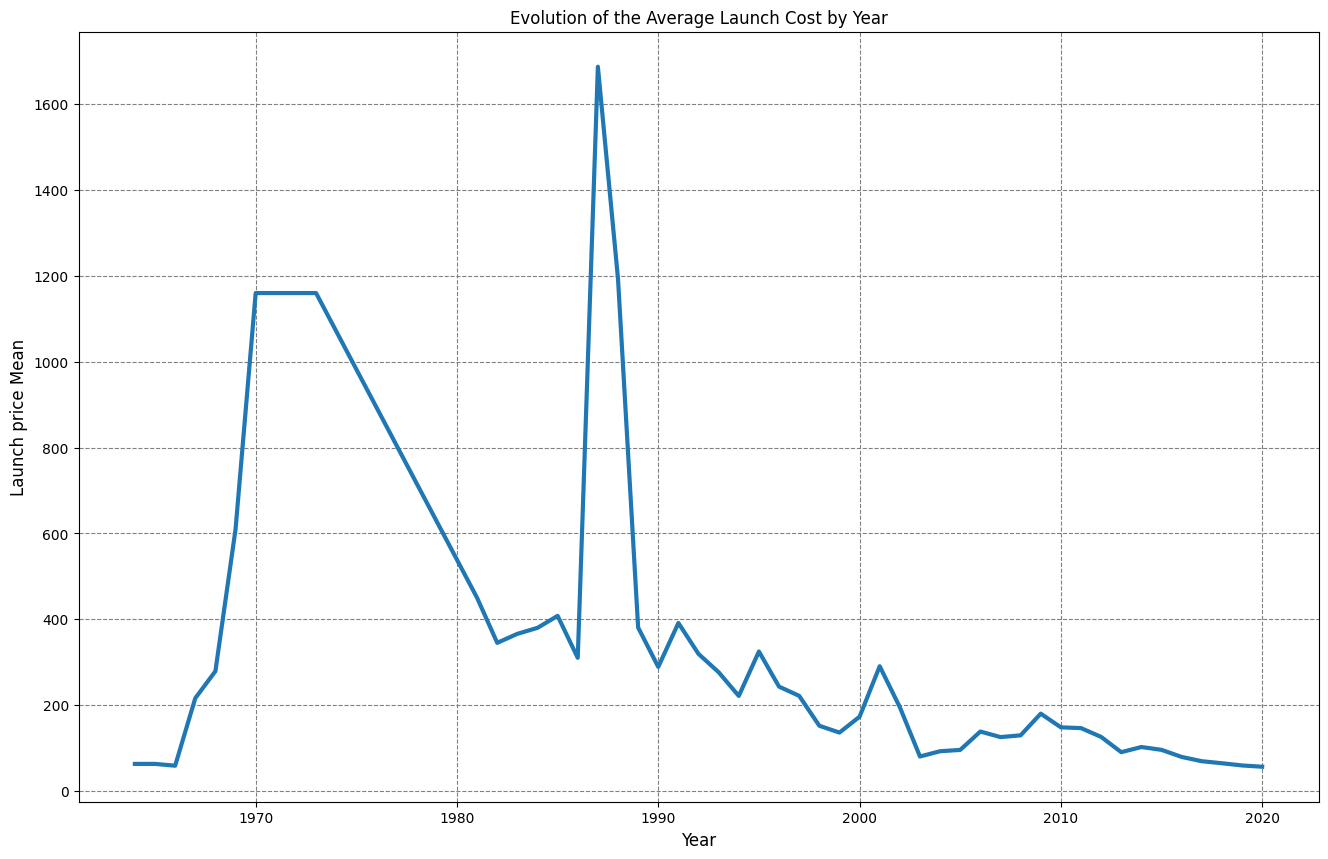

In [51]:
# Plotting a lineplot using seaborn
fig = plt.figure(figsize=(16, 10))

plt.title('Evolution of the Average Launch Cost by Year', fontsize=12)

ax = sns.lineplot(data=df_data_price,
                  errorbar=None,
                  x='Year',
                  y='Price',
                  linewidth=3)

ax.grid(color='grey', linestyle='--')

ax.set_ylabel('Launch price Mean', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

plt.show()

In [84]:
df_data_price.loc[(df_data_price['Year'] < 1990) & (df_data_price['Year'] > 1985)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
1861,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1989-11-23 00:23:00,Space Shuttle Discovery | STS-33R,StatusRetired,450.00,Success,"1,989.00"
1864,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1989-10-18 16:53:00,Space Shuttle Atlantis | STS-34R,StatusRetired,450.00,Success,"1,989.00"
1870,Martin Marietta,"SLC-4W, Vandenberg AFB, California, USA",1989-09-06 01:48:00,Titan II(23)G | USA-45,StatusRetired,35.00,Success,"1,989.00"
1877,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1989-08-08 12:37:00,Space Shuttle Columbia | STS-28R,StatusRetired,450.00,Success,"1,989.00"
1891,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1989-05-04 18:46:00,Space Shuttle Atlantis | STS-30R,StatusRetired,450.00,Success,"1,989.00"
1896,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1989-03-13 14:57:00,Space Shuttle Discovery | STS-29R,StatusRetired,450.00,Success,"1,989.00"
1913,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1988-12-02 14:30:00,Space Shuttle Atlantis | STS-27R,StatusRetired,450.00,Success,"1,988.00"
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15 03:00:00,Energiya/Buran | Buran,StatusRetired,"5,000.00",Success,"1,988.00"
1922,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1988-09-29 15:37:00,Space Shuttle Discovery | STS-26R,StatusRetired,450.00,Success,"1,988.00"
1929,Martin Marietta,"SLC-4W, Vandenberg AFB, California, USA",1988-09-05 09:25:00,Titan II(23)G | USA-32,StatusRetired,35.00,Success,"1,988.00"


A clear pattern emerges in the cost trends for space launches: costs rise initially as space exploration begins, then gradually decrease as technology advances. The most significant drop in launch costs occurred during the Cold War, coinciding with a peak in the number of launches as the USA and USSR invested heavily in rapid technological advancements. Even after the Cold War, launch costs have continued to decline steadily, reflecting ongoing innovation in space technology. This decreasing trend in costs has opened up the market for new players, enabling more companies to participate in space exploration and expanding global access to space.

## Launches over Time by the Top 10 Organisations.

In [52]:
# Grouping the data by organisation and listing the top 10 by number of launchs
top_10_org = df_data.groupby('Organisation').size().reset_index(name='Total Launchs').sort_values(by='Total Launchs', ascending=False).iloc[0:10]
top_10_org = top_10_org['Organisation'].to_list()
top_10_org

['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [53]:
# Filtering the dataset by the top 10 organisations list
df_data_org = df_data[df_data['Organisation'].isin(top_10_org)]
df_data_org_grouped = df_data_org.groupby(by=['Organisation', 'Launch Year']).size().reset_index(name='Total Launchs')

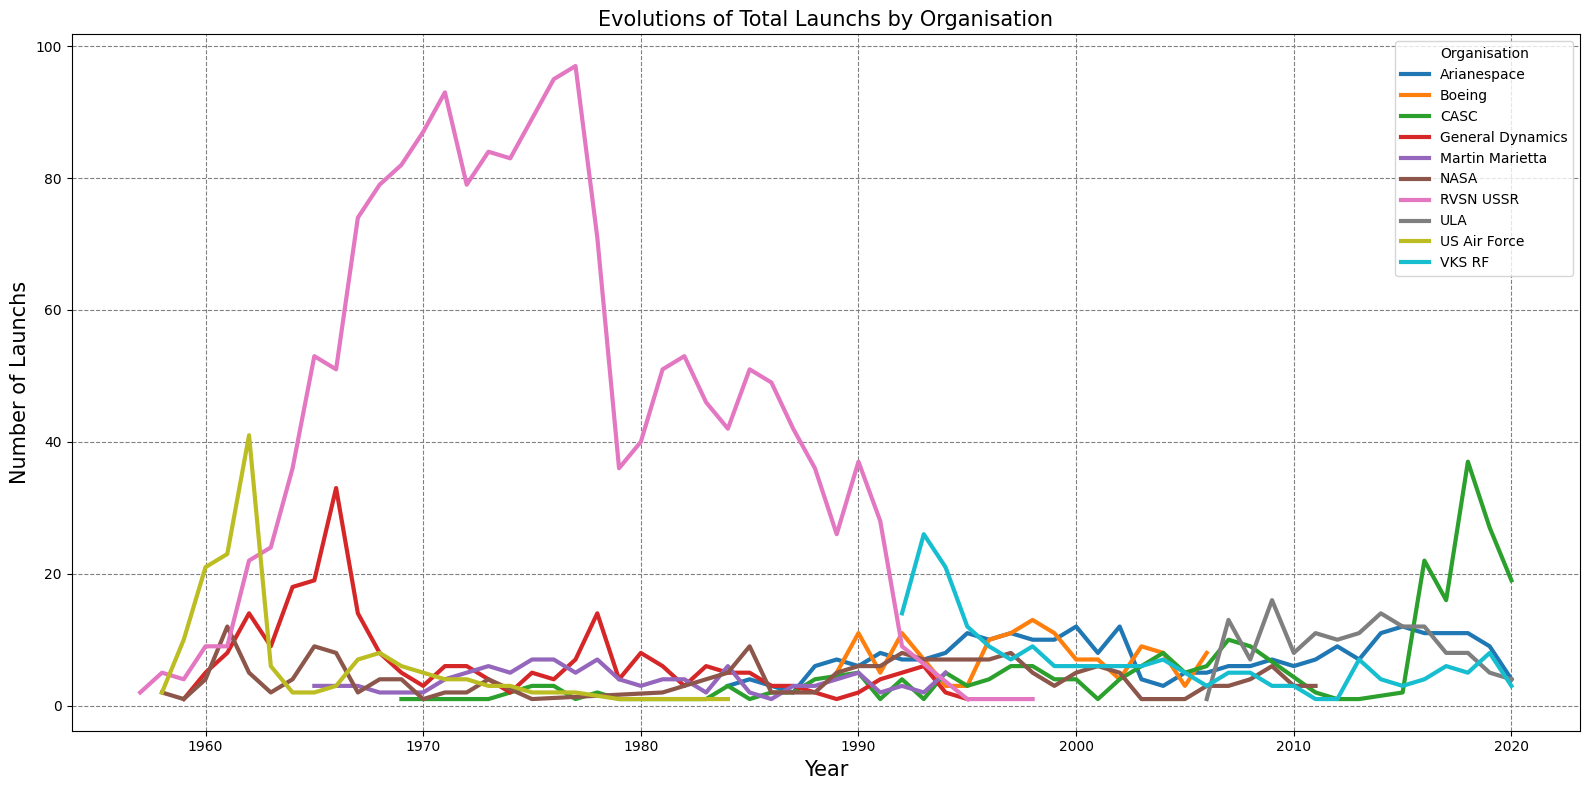

In [54]:
# Plotting a lineplot using seaborn
fig = plt.figure(figsize=(16, 8))

plt.title('Evolutions of Total Launchs by Organisation', fontsize=15)

ax = sns.lineplot(data=df_data_org_grouped,
                  x='Launch Year',
                  y='Total Launchs',
                  hue='Organisation',
                  linewidth=3)

ax.set_ylabel('Number of Launchs', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

ax.grid(color='grey', linestyle='--')

fig.tight_layout()

plt.show()

Space exploration began with the USA, initially through the Air Force, followed by NASA and General Dynamics, positioning the United States as the first major player in the field. The Soviet Union soon followed, committing substantial resources over a much longer period. While the U.S. scaled back its launches around 1969—coinciding with the historic moon landing—the USSR continued its intense investment in space exploration until the nation’s dissolution in 1991.

Notably, a resurgence in launch activity is evident post-2005, led predominantly by China’s government agency, CASC. This rise underscores China’s strategic commitment to space exploration, positioning it as a new global leader in the sector.

## Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. The following graph aims to capture the leading countries in the number of launchs during this period of time

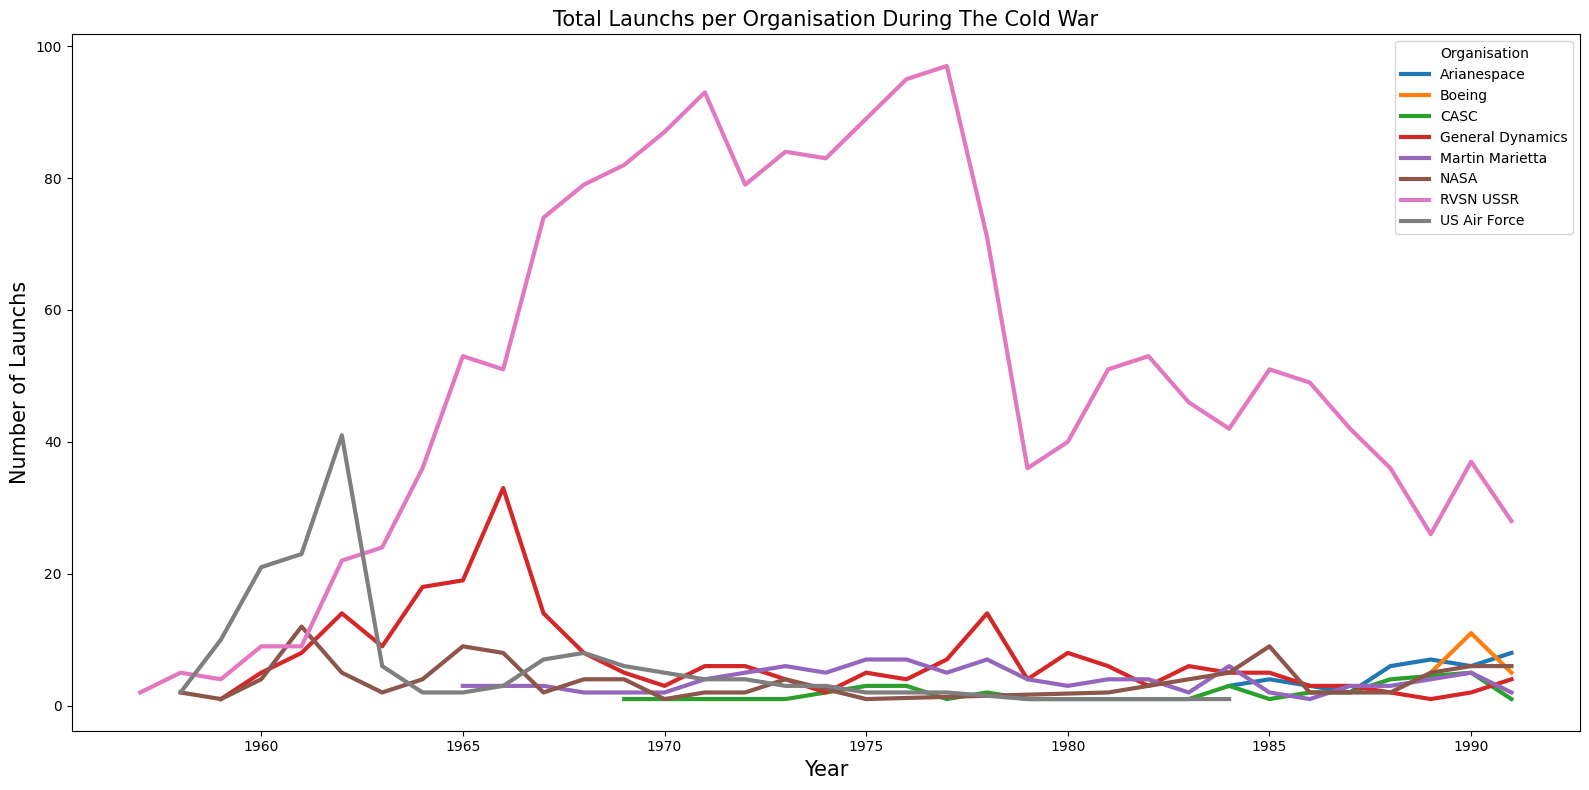

In [55]:
# Pltting a lineplot using seaborn
fig = plt.figure(figsize=(16, 8))

plt.title('Total Launchs per Organisation During The Cold War', fontsize=15)

ax = sns.lineplot(data=df_data_org_grouped.loc[df_data_org_grouped['Launch Year'] <= 1991],
                  x='Launch Year',
                  y='Total Launchs',
                  hue='Organisation',
                  linewidth=3)

ax.set_ylabel('Number of Launchs', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

fig.tight_layout()

plt.show()

Initially, the U.S. Air Force held a lead in the space race, but this quickly shifted in the latter half of the 1960s as the USSR took over, maintaining dominance until its dissolution in 1991.

The difference in launch volume between the Soviet Union and U.S. organizations is substantial, with the USSR executing significantly more launches. This gap highlights the USSR's intense commitment to space exploration during the Cold War, surpassing the United States by a remarkable margin.

### Total number of launches of the USSR and the USA

Former Soviet Republics like Kazakhstan are included

In [56]:
# Creating a copy of the data
df_data_cw = df_data

# Replacing former republics names for better visualization
df_data_cw['Country'] = df_data['Country'].str.replace('Kazakhstan', 'Russian Federation')

# Filtering the data for USA and USSR
df_data_cw = df_data_cw.loc[(df_data['Country'] == 'United States of America') | (df_data['Country'] == 'Russian Federation')]

# Grouping by country
df_data_cw = df_data_cw.groupby('Country').size()
df_data_cw

,0
Country,
Russian Federation,2099
United States of America,1387


In [57]:
# Plotting a piechart using plotly
fig = px.pie(values=df_data_cw.values,
             color=df_data_cw.index,
             names=df_data_cw.index,
             hole=0.5,
             title='Number of Launchs USSR x USA',
             color_discrete_map={'United States of America': 'lightblue',
                           'Russian Federation': 'salmon'})

# Update the layout to set the width and height
fig.update_layout(width=900,
                  height=600)

fig.update_traces(textinfo='percent',
                  textfont_size=20)


fig.show()


Today, Russia, including launches from the former Soviet Union and Soviet republics, still leads the United States in total space launches. This reflects a shift in U.S. priorities, as the country has scaled back its investment in space exploration, redirecting resources to other strategic areas in the decades following the Cold War. Meanwhile, Russia has continued its commitment, maintaining a significant presence in space activity even after the dissolution of the USSR. This trend highlights how historical context and shifting national priorities have shaped each nation's approach to space exploration over time.

### Total Number of Launches Year-On-Year by the Two Superpowers

In [58]:
# Creating another df grouping the total number of launchs by year for the two superpowers
df_data_cw_year = df_data

df_data_cw_year['Country'] = df_data['Country'].str.replace('Kazakhstan', 'Russian Federation')

df_data_cw_year = df_data_cw_year.loc[(df_data['Country'] == 'United States of America') | (df_data['Country'] == 'Russian Federation')]

df_data_cw_year = df_data_cw_year.groupby(['Country', 'Launch Year']).size().reset_index(name='Total Launchs')

df_data_cw_year.head(5)

,Country,Launch Year,Total Launchs
0,Russian Federation,1957,2
1,Russian Federation,1958,5
2,Russian Federation,1959,4
3,Russian Federation,1960,9
4,Russian Federation,1961,9


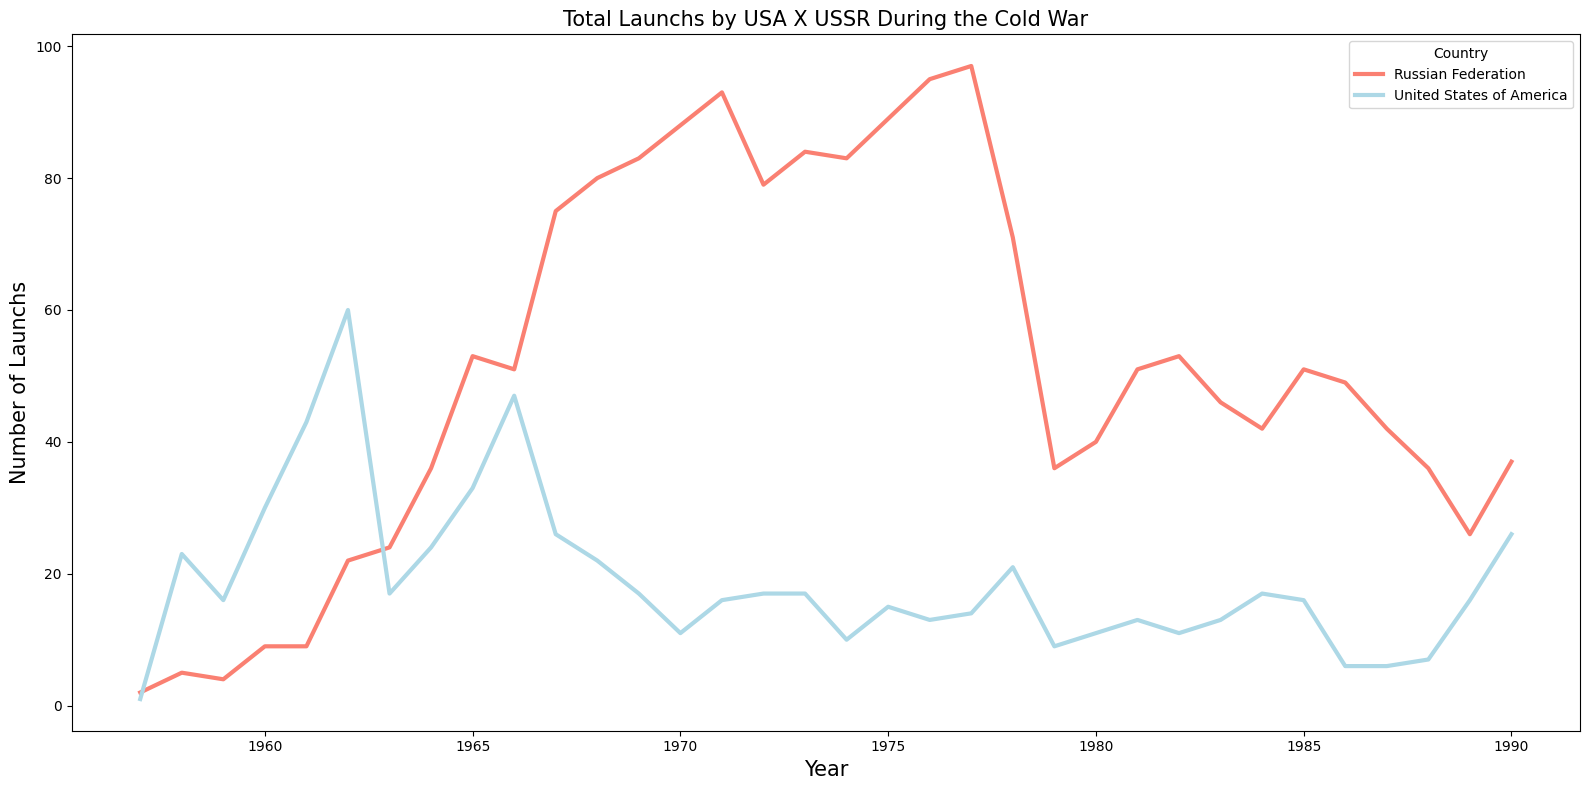

In [59]:
# Plotting the number of launchs every year by the two superpowers during the Cold War
fig = plt.figure(figsize=(16, 8))

plt.title('Total Launchs by USA X USSR During the Cold War', fontsize=15)

ax = sns.lineplot(data=df_data_cw_year.loc[df_data_cw_year['Launch Year'] < 1991],
                  x='Launch Year',
                  y='Total Launchs',
                  hue='Country',
                  linewidth=3,
                  palette={'United States of America': 'lightblue',
                           'Russian Federation': 'salmon'})

ax.set_ylabel('Number of Launchs', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

fig.tight_layout()

plt.show()

The initial U.S. lead in space exploration was soon overtaken by the USSR, marking the beginning of the Soviet Union's dominant role in space launches during the Cold War. This trend illustrates the competitive nature of the Space Race, with the USSR consistently surpassing the U.S. in launch numbers through substantial, sustained investments. The data clearly reflects this period of Soviet dominance, underscoring how the Cold War fueled an unprecedented commitment to space exploration by both superpowers.

### Total Number of Mission Failures Year on Year.

In [60]:
# Creating another df grouping the total number of launch failures by year for the two superpowers
df_data_cw_status = df_data

df_data_cw_status['Country'] = df_data['Country'].str.replace('Kazakhstan', 'Russian Federation')

df_data_cw_status = df_data_cw_status.loc[(df_data['Country'] == 'United States of America') | (df_data['Country'] == 'Russian Federation')]

df_data_cw_status = df_data_cw_status.groupby(['Country', 'Launch Year', 'Mission_Status']).size().reset_index(name='Total Launchs')

df_data_cw_status.head(4)

,Country,Launch Year,Mission_Status,Total Launchs
0,Russian Federation,1957,Success,2
1,Russian Federation,1958,Failure,4
2,Russian Federation,1958,Success,1
3,Russian Federation,1959,Failure,1


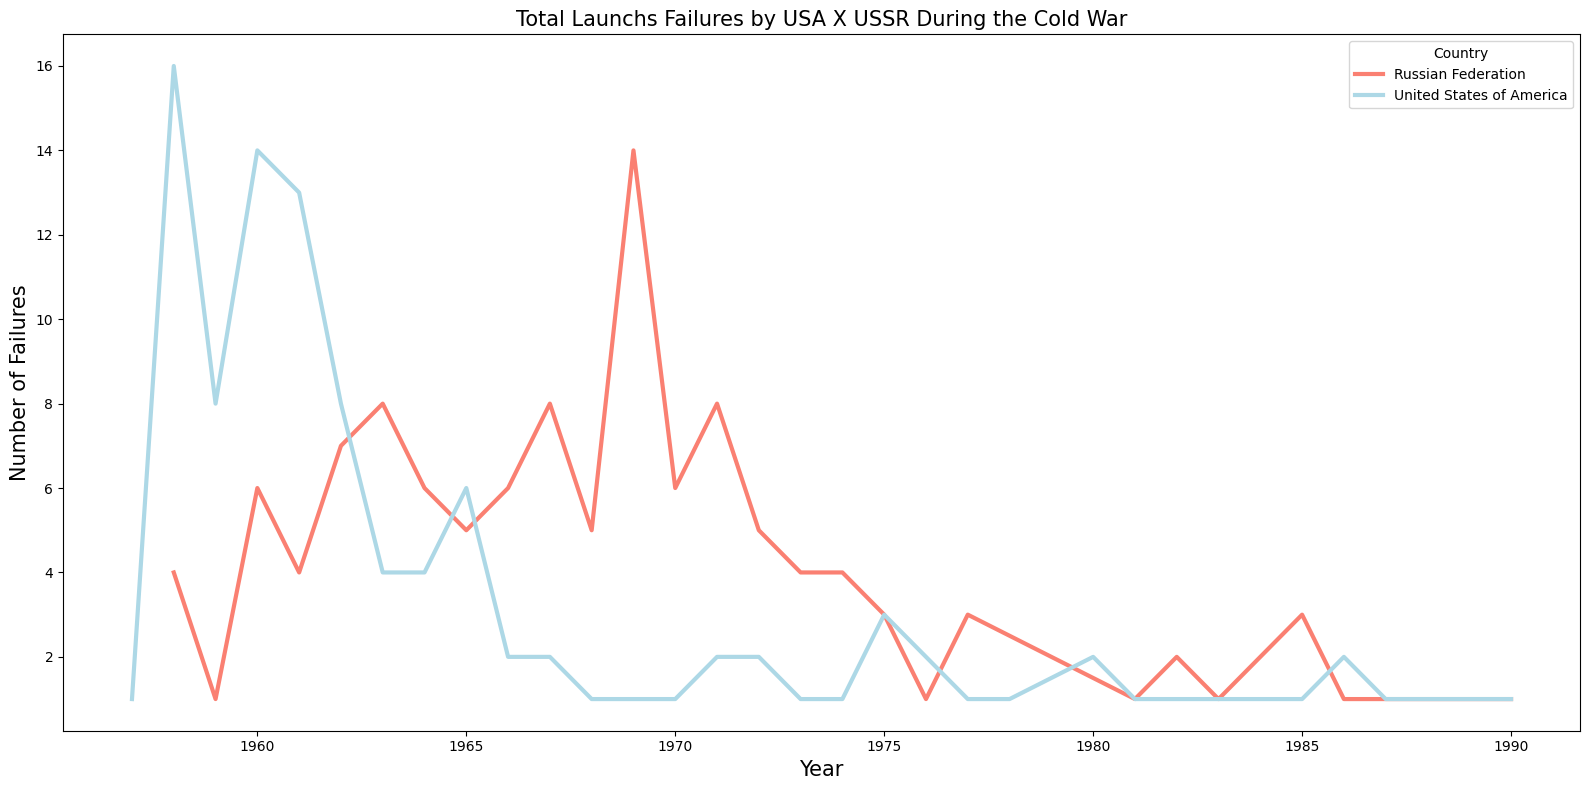

In [61]:
# Plotting the number of failures every year by the two superpowers during the Cold War
fig = plt.figure(figsize=(16, 8))

plt.title('Total Launchs Failures by USA X USSR During the Cold War', fontsize=15)

ax = sns.lineplot(data=df_data_cw_status.loc[(df_data_cw_status['Launch Year'] < 1991) &
                                             (df_data_cw_status['Mission_Status'] == 'Failure')],
                  x='Launch Year',
                  y='Total Launchs',
                  hue='Country',
                  linewidth=3,
                  palette={'United States of America': 'lightblue',
                           'Russian Federation': 'salmon'})

ax.set_ylabel('Number of Failures', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

fig.tight_layout()

plt.show()

The high failure rate in the early U.S. space launches reflects both the infancy of rocket technology and the ambitious number of launches conducted. However, the U.S. saw a rapid decrease in failure rates through the 1960s, signaling significant advancements in rocket science. In contrast, while the USSR's failure rate was initially lower, it remained high for a prolonged period, suggesting a greater tolerance for risk and potentially slower technological progress in rocket engineering. This difference highlights the Soviet government’s intense commitment to frequent launches, even if it meant contending with higher failure rates over a longer timeframe.

## Percentage of Failures over Time


In [62]:
# Calculating total launches and reseting index
df_data_status = df_data.groupby(['Launch Year', 'Mission_Status']).size().reset_index(name='Total Launches')

# Calculating total launches per year
total_launches_per_year = df_data_status.groupby('Launch Year')['Total Launches'].sum().reset_index(name='Total')

# Merging total launches with the original DataFrame
df_data_status = df_data_status.merge(total_launches_per_year, on='Launch Year')

# Filtering for failures and calculating the percentage of failures
df_data_status['Failure %'] = df_data_status.apply(
    lambda row: (row['Total Launches'] / row['Total']) * 100 if row['Mission_Status'] == 'Failure' else 0, axis=1)

# Filtering only rows where Mission_Status is 'Failure' for simplicity
df_failures_percentage = df_data_status[df_data_status['Mission_Status'] == 'Failure']

df_failures_percentage.head()

,Launch Year,Mission_Status,Total Launches,Total,Failure %
0,1957,Failure,1,3,33.33
2,1958,Failure,20,28,71.43
5,1959,Failure,9,20,45.00
8,1960,Failure,20,39,51.28
10,1961,Failure,17,52,32.69


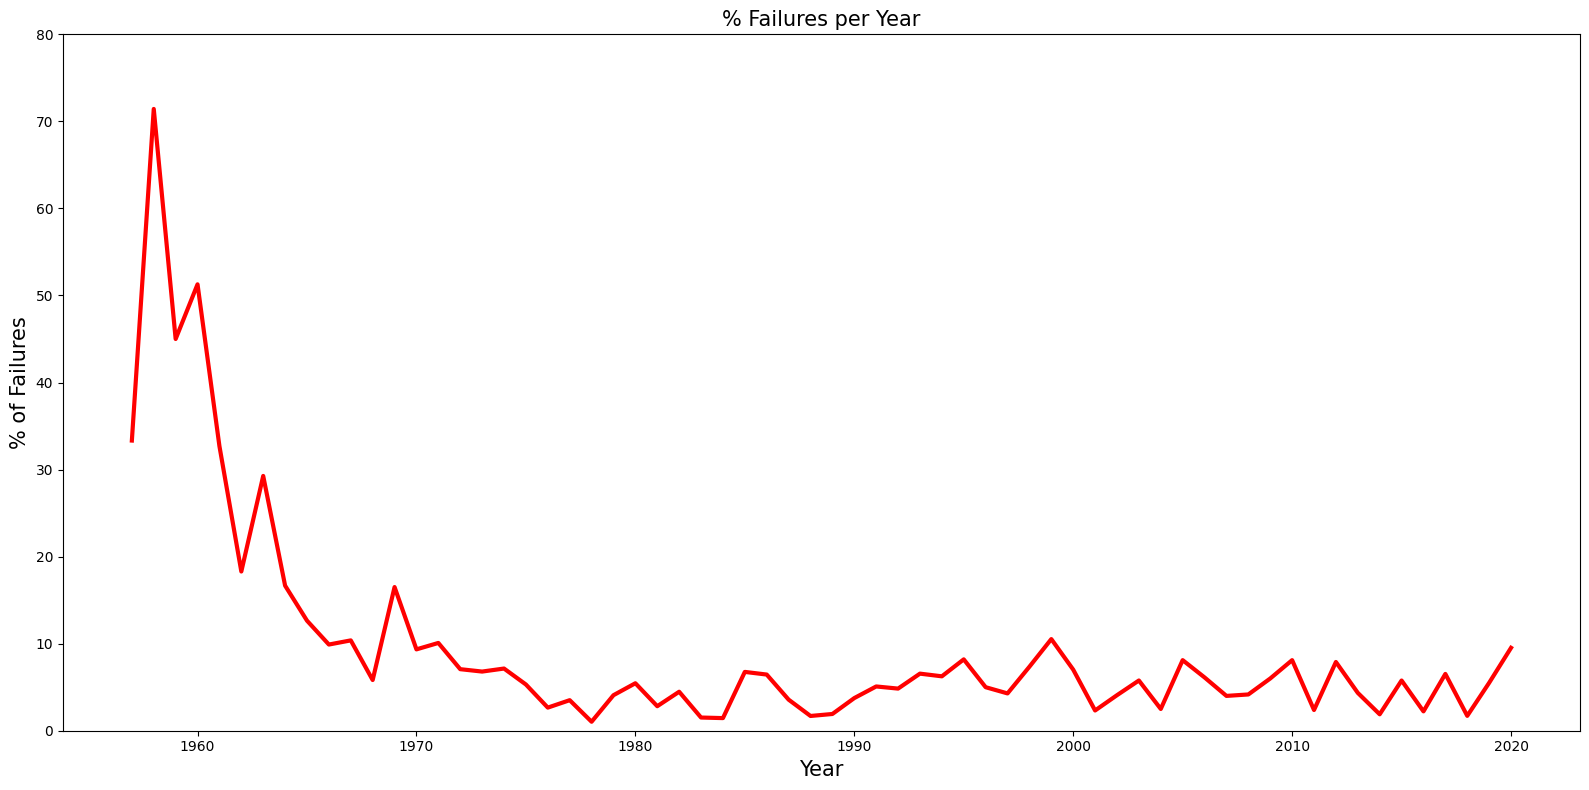

In [87]:
# PLotting a lineplot using seaborn
fig = plt.figure(figsize=(16, 8))

plt.title('% Failures per Year', fontsize=15)

ax = sns.lineplot(data=df_failures_percentage,
                  x='Launch Year',
                  y='Failure %',
                  linewidth=3,
                  color='red')

ax.set_ylim(0, 80)
ax.set_ylabel('% of Failures', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

fig.tight_layout()

plt.show()

The percentage of failures declined significantly during the initial two decades of space exploration, highlighting rapid advancements in rocket engineering during this period. Notably, after 1970, the failure rate appeared to stabilize around a limit of 10%, fluctuating over time but consistently remaining below this threshold. These variations may reflect the attempts of various countries and organizations to enter the field of space exploration, often without being fully prepared for the challenges involved.

## The leading Country in Total Launchs Through Time

In [64]:
# Grouping by Country and Year
df_data_lead = df_data.groupby(['Country', 'Launch Year']).size().reset_index(name='Total Launchs')

# Getting the index of the row with the max 'Total Launchs' for each 'Launch Year'
idx = df_data_lead.groupby('Launch Year')['Total Launchs'].idxmax()

# Using .loc[] to get the corresponding rows
df_max_launches_per_year = df_data_lead.loc[idx]

df_max_launches_per_year.head()

,Country,Launch Year,Total Launchs
225,Russian Federation,1957,2
290,United States of America,1958,23
291,United States of America,1959,16
292,United States of America,1960,30
293,United States of America,1961,43


<ipython-input-65-76ee7870f7bd>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



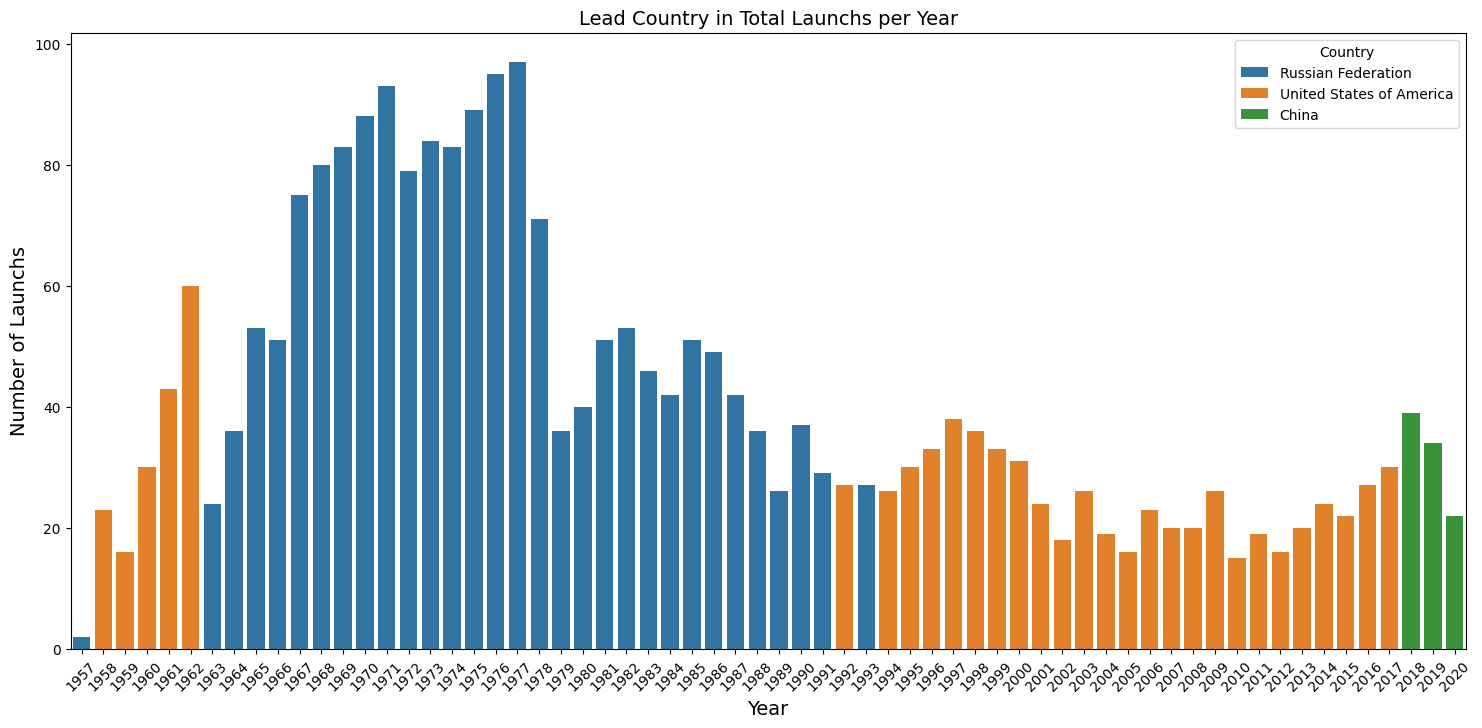

In [65]:
# Plotting a barplot using seaborn
fig = plt.figure(figsize=(18, 8))

plt.title('Lead Country in Total Launchs per Year', fontsize=14)

ax = sns.barplot(data=df_max_launches_per_year,
            x='Launch Year',
            y='Total Launchs',
            hue='Country')

ax.set_ylabel('Number of Launchs', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

After an initial lead by the USA, the USSR dominated the space launch podium throughout the Cold War, achieving the highest number of launches. Following the dissolution of the Soviet Union, the former republics struggled to maintain their previous dominance and were subsequently surpassed by the USA. However, in recent years, this dynamic appears to be shifting, with China emerging as a leader in the number of space launches.

Whether the USA will respond to this challenge and initiate a new Space Race remains to be seen.

In [66]:
# Filtering for only successfull missions
df_data_lead_success = df_data.loc[df_data['Mission_Status'] == 'Success'].groupby(['Country', 'Launch Year']).size().reset_index(name='Total Launchs')

# Getting the index of the row with the max 'Total Launchs' for each 'Launch Year'
idx = df_data_lead_success.groupby('Launch Year')['Total Launchs'].idxmax()

# Using .loc[] to get the corresponding rows
df_max_launches_per_year_success = df_data_lead_success.loc[idx]

df_max_launches_per_year_success.head()

,Country,Launch Year,Total Launchs
188,Russian Federation,1957,2
252,United States of America,1958,5
253,United States of America,1959,6
254,United States of America,1960,16
255,United States of America,1961,27


<ipython-input-67-0896a4391c93>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



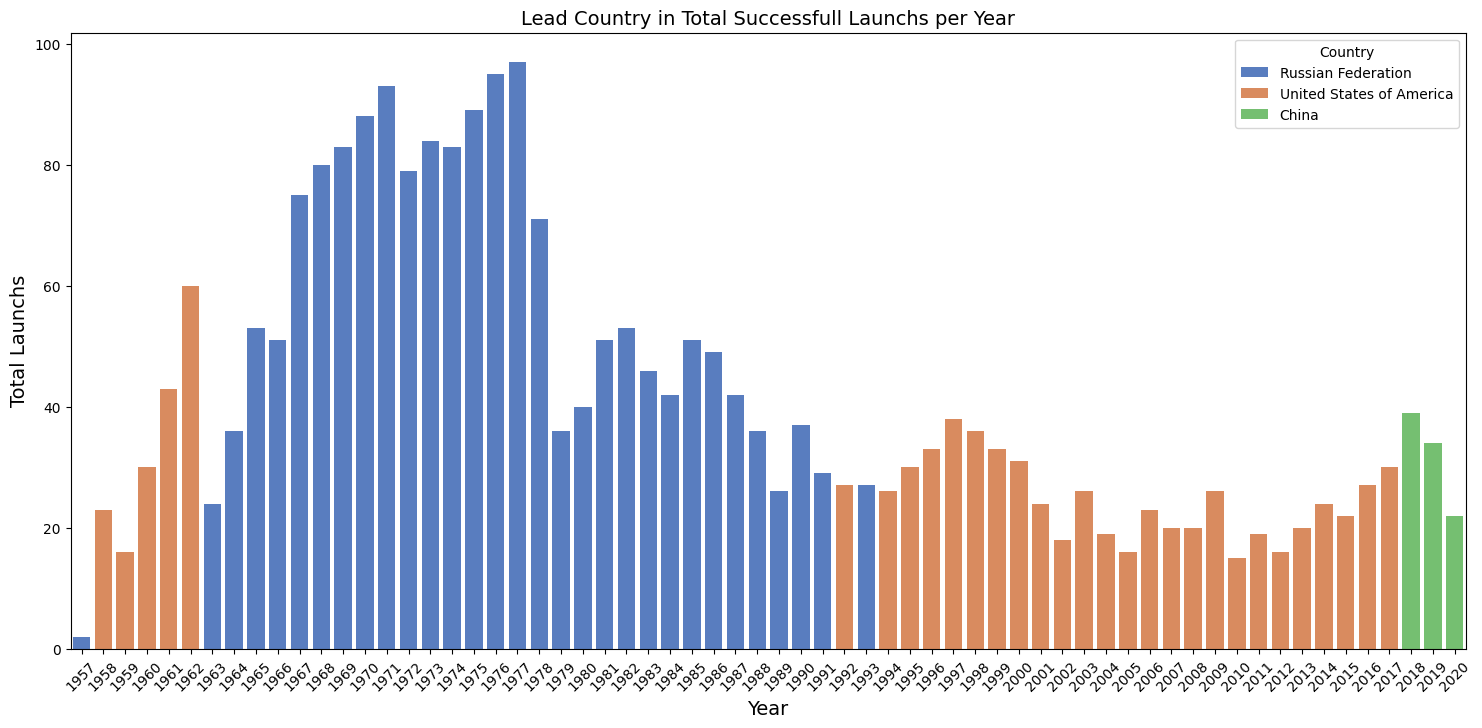

In [67]:
# Plotting the barplot again using seaborn

fig = plt.figure(figsize=(18, 8))

plt.title('Lead Country in Total Successfull Launchs per Year', fontsize=14)

ax = sns.barplot(data=df_max_launches_per_year,
            x='Launch Year',
            y='Total Launchs',
            hue='Country',
            palette='muted')

ax.set_ylabel('Total Launchs', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

## Organisation Doing the Most Number of Launches Through Years

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [68]:
# Calculating the number of launchs per Organisation by Year
lead_org = df_data.groupby(['Organisation', 'Launch Year']).size().reset_index(name='Total Launchs')

# Getting hold of the index of the ones with the max number every year
org_idx = lead_org.groupby('Launch Year')['Total Launchs'].idxmax().to_list()

# Filtering the dataset using the index list and the .iloc method
lead_org_year = lead_org.iloc[org_idx]

lead_org_year.head()

,Organisation,Launch Year,Total Launchs
497,RVSN USSR,1957,2
624,US Navy,1958,12
599,US Air Force,1959,10
600,US Air Force,1960,21
601,US Air Force,1961,23


<ipython-input-69-e1517819aae5>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



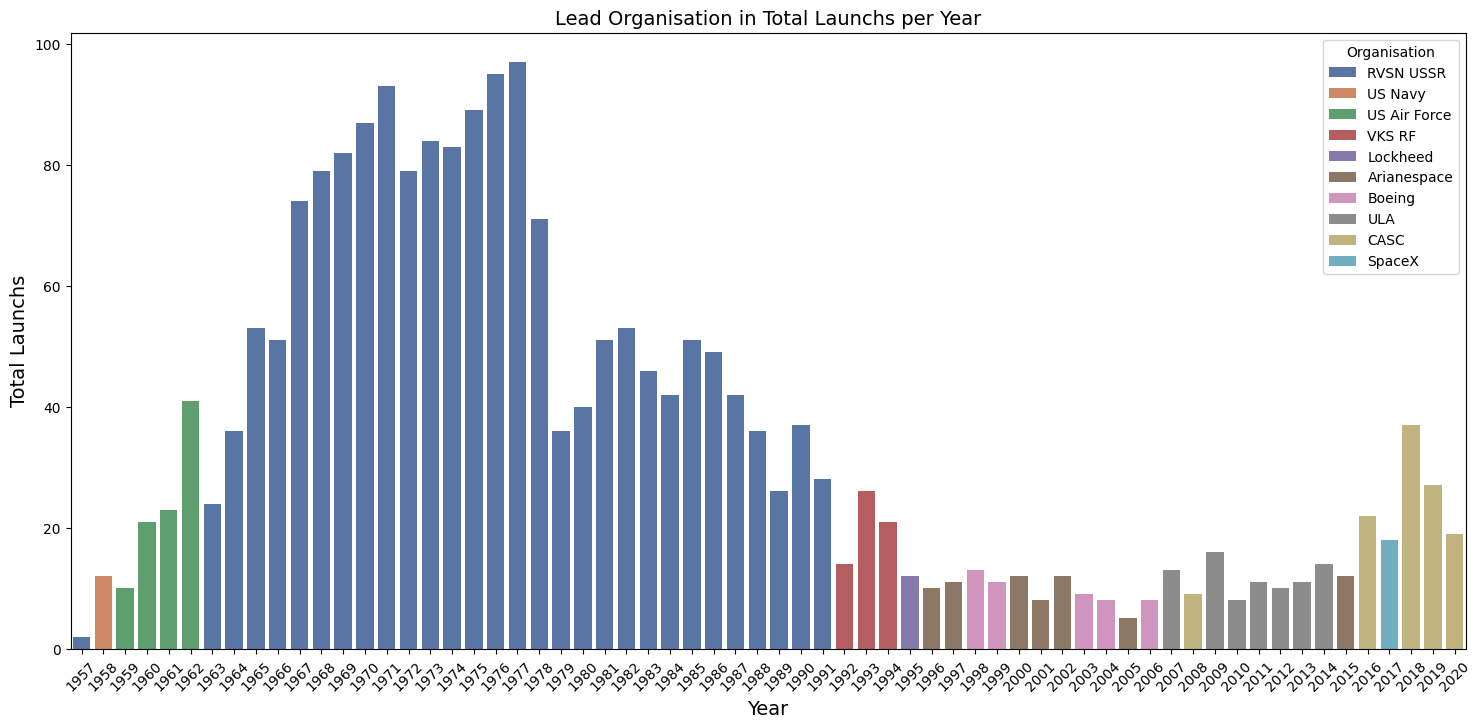

In [69]:
# Plotting a bargraph using seaborn
fig = plt.figure(figsize=(18, 8))

plt.title('Lead Organisation in Total Launchs per Year', fontsize=14)

ax = sns.barplot(data=lead_org_year,
            x='Launch Year',
            y='Total Launchs',
            hue='Organisation',
            palette='deep')

ax.set_ylabel('Total Launchs', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

# Conclusion

The analysis of space launches around the world reveals the intricate dynamics of global space exploration, particularly during the Cold War era. This project has illuminated how geopolitical tensions, primarily between the United States and the Soviet Union, fueled advancements in space technology and exploration efforts. By examining the launch statistics of various space agencies, we can observe significant patterns in the frequency of launches, success and failure rates, and the respective impacts of national priorities on space initiatives.

A notable shift in recent years is the decreasing cost of access to space, allowing new organizations and countries to participate in space exploration. The emergence of private companies has revolutionized the industry, making it more accessible and affordable. This democratization of space has not only fostered innovation but also increased the number of launches globally, highlighting the collaborative spirit of modern exploration.

Additionally, China has emerged as a dominant player in the field, rapidly increasing its launch frequency and capabilities. As China's space program matures, it has begun to rival the traditional leaders in space exploration, reshaping the global landscape. This new competition encourages advancements in technology and pushes the boundaries of what is possible in space.

Through this comparative analysis, it becomes clear that space exploration is not merely a scientific endeavor but a reflection of political aspirations and national pride. The competition for technological supremacy has driven nations to invest heavily in their space programs, resulting in milestones that have shaped our understanding of space. The successes of NASA and the Soviet space program highlighted the capabilities of their respective nations while paving the way for future collaborations in the space sector.

As we look to the future, it is essential to recognize the lessons learned from the past. International cooperation in space exploration, as seen in projects like the International Space Station, can lead to shared knowledge and mutual benefits, fostering peace and collaboration beyond Earth. This project serves as a reminder of the profound relationship between politics and space exploration, urging us to continue prioritizing cooperative efforts for the betterment of humanity and our understanding of the cosmos.